# Study Case Logistic Linear

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [57]:
data_log = pd.read_csv('Default.csv')
data_log = data_log.drop(['Unnamed: 0'], axis=1)
data_log.loc[data_log['default']=='No','default'] = 0
data_log.loc[data_log['default']=='Yes','default'] = 1
data_log.loc[data_log['student']=='No','student'] = 0
data_log.loc[data_log['student']=='Yes','student'] = 1
data_log.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


## Task

1. Bagaimana caranya mendapatkan hasil dari logistic regression dengan x = income, dan y = default.
2. Bagaimana caranya mendapatkan hasil dari logistic regression dengan x = balance, dan y = student.
3. Bagaimana caranya mendapatkan hasil dari logistic regression dengan x = balance, dan y = default.
4. Bagaimana caranya mendapatkan hasil dari multiple logistic dengan x = balance & income, dan y = default.
5. Bagaimana caranya mendapatkan hasil dari multiple logistic dengan x = balance & income, dan y = income.

## 1. x = income, y = default

In [58]:
clf = LogisticRegression() 

In [59]:
X = data_log[['income']]
y = data_log['default']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=45)

In [61]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
clf.coef_

array([[-0.00011037]])

In [63]:
clf.intercept_

array([-6.5987289e-09])

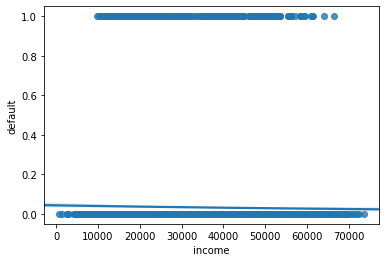

In [64]:
sns.regplot(x='income', y='default', data = data_log, logistic=True)
plt.show()

**Check Probability** using *predict_proba*

In [65]:
clf.predict_proba(X_test)

array([[0.93471233, 0.06528767],
       [0.96416446, 0.03583554],
       [0.99863261, 0.00136739],
       ...,
       [0.96336827, 0.03663173],
       [0.97300385, 0.02699615],
       [0.99040154, 0.00959846]])

Calculate manually using first data

In [66]:
X_test.head()

,income
4132,24113.917286
6553,29830.056741
7604,59740.209974
585,19476.587579
5924,19342.158088


In [67]:
y = -0.00011037 * 24113.917286 + -6.5987289e-09
y

-2.661453057454549

In [68]:
p = math.exp(y) / (math.exp(y)+1)
p

0.06528660563225831

In [69]:
clf.predict_proba(X_test)[0][1]

0.06528767091893516

**The manual result** is as same as the result from *predict_proba*

now let's *predict* the data test

In [70]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
r2_score(y_test, pred)

-0.04004160166406634

In [72]:
pd.DataFrame({'default' : y_test, 'prediction':pred})

,default,prediction
4132,0,0
6553,0,0
7604,0,0
585,0,0
5924,0,0
9642,0,0
2846,0,0
9751,0,0
1891,0,0
3367,0,0


## 2. x =  balance, y = student

In [73]:
clf = LogisticRegression() 

In [74]:
X = data_log[['balance']]
y = data_log['student']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=45)

In [76]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
clf.coef_

array([[0.00091026]])

In [78]:
clf.intercept_

array([-1.68583345])

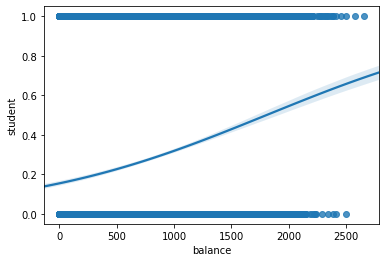

In [79]:
sns.regplot(x='balance', y='student', data = data_log, logistic=True)
plt.show()

**Check Probability** using *predict_proba*

In [80]:
clf.predict_proba(X_test)

array([[0.6977208 , 0.3022792 ],
       [0.58975219, 0.41024781],
       [0.76903094, 0.23096906],
       ...,
       [0.72797062, 0.27202938],
       [0.58280598, 0.41719402],
       [0.84367543, 0.15632457]])

Calculate manually using first data

In [81]:
X_test.head()

,balance
4132,933.104366
6553,1453.316173
7604,530.603503
585,830.171511
5924,375.306305


In [83]:
y = 0.00091026 * 933.104366 + -1.68583345
y

-0.8364658698048401

In [84]:
p = math.exp(y) / (math.exp(y)+1)
p

0.30227963432834676

In [85]:
clf.predict_proba(X_test)[0][1]

0.30227920396388375

The manual result is as same as the result from predict_proba

now let's predict the data test

In [87]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
r2_score(y_test, pred)

-0.4393472454580143

In [89]:
pd.DataFrame({'default' : y_test, 'prediction':pred})

,default,prediction
4132,0,0
6553,0,0
7604,0,0
585,1,0
5924,1,0
9642,0,0
2846,0,0
9751,1,0
1891,0,0
3367,0,0


## 3. x = balance, y = default

In [90]:
clf = LogisticRegression() 

In [91]:
X = data_log[['balance']]
y = data_log['default']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=45)

In [93]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
clf.coef_

array([[0.00423834]])

In [95]:
clf.intercept_

array([-8.60235278])

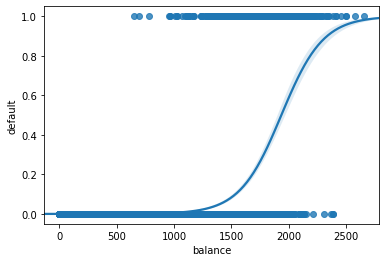

In [96]:
sns.regplot(x='balance', y='default', data = data_log, logistic=True)
plt.show()

Check Probability using predict_proba

In [97]:
clf.predict_proba(X_test)

array([[9.90505827e-01, 9.49417282e-03],
       [9.20026126e-01, 7.99738735e-02],
       [9.98262335e-01, 1.73766513e-03],
       ...,
       [9.95208500e-01, 4.79149964e-03],
       [9.09649054e-01, 9.03509459e-02],
       [9.99816361e-01, 1.83639412e-04]])

Calculate manually using first data

In [98]:
X_test.head()

,balance
4132,933.104366
6553,1453.316173
7604,530.603503
585,830.171511
5924,375.306305


In [101]:
y = 0.00423834 * 933.104366 + -8.60235278
y

-4.64753922140756

In [102]:
p = math.exp(y) / (math.exp(y)+1)
p

0.009494156877767331

In [103]:
clf.predict_proba(X_test)[0][1]

0.009494172824942804

The manual result is as same as the result from predict_proba

now let's predict the data test

In [104]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
r2_score(y_test, pred)

0.16256390515360886

In [106]:
pd.DataFrame({'default' : y_test, 'prediction':pred})

,default,prediction
4132,0,0
6553,0,0
7604,0,0
585,0,0
5924,0,0
9642,0,0
2846,0,0
9751,0,0
1891,0,0
3367,0,0


## 4. x = balance & income, y = default

In [107]:
clf = LogisticRegression() 

In [108]:
X = data_log[['balance', 'income']]
y = data_log['default']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=45)

In [110]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
clf.coef_

array([[ 0.00035113, -0.00012406]])

In [112]:
clf.intercept_

array([-2.07460717e-06])

Check Probability using predict_proba

In [113]:
clf.predict_proba(X_test)

array([[9.34863950e-01, 6.51360498e-02],
       [9.60471532e-01, 3.95284678e-02],
       [9.99272400e-01, 7.27600261e-04],
       ...,
       [9.67844261e-01, 3.21557389e-02],
       [9.70914365e-01, 2.90856352e-02],
       [9.94576746e-01, 5.42325377e-03]])

Calculate manually using first data

In [115]:
X_test.head()

,balance,income
4132,933.104366,24113.917286
6553,1453.316173,29830.056741
7604,530.603503,59740.209974
585,830.171511,19476.587579
5924,375.306305,19342.158088


In [116]:
y = 0.00035113 * 933.104366 + -0.00012406 * 24113.917286 + -2.07460717e-06
y

-2.66393371707475

In [117]:
p = math.exp(y) / (math.exp(y)+1)
p

0.06513538834945069

In [118]:
clf.predict_proba(X_test)[0][1]

0.06513604976928195

The manual result is as same as the result from predict_proba

now let's predict the data test

In [119]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
r2_score(y_test, pred)

-0.04004160166406634

In [121]:
pd.DataFrame({'default' : y_test, 'prediction':pred})

,default,prediction
4132,0,0
6553,0,0
7604,0,0
585,0,0
5924,0,0
9642,0,0
2846,0,0
9751,0,0
1891,0,0
3367,0,0


## 5. x = balance & income, y = student

In [122]:
clf = LogisticRegression() 

In [123]:
X = data_log[['balance', 'income']]
y = data_log['student']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=45)

In [125]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
clf.coef_

array([[ 0.00277778, -0.00013254]])

In [127]:
clf.intercept_

array([6.36846029e-06])

Check Probability using predict_proba

In [129]:
clf.predict_proba(X_test)

array([[0.646609  , 0.353391  ],
       [0.47920413, 0.52079587],
       [0.99841286, 0.00158714],
       ...,
       [0.85639963, 0.14360037],
       [0.54499939, 0.45500061],
       [0.99619638, 0.00380362]])

Calculate manually using first data

In [130]:
X_test.head()

,balance,income
4132,933.104366,24113.917286
6553,1453.316173,29830.056741
7604,530.603503,59740.209974
585,830.171511,19476.587579
5924,375.306305,19342.158088


In [131]:
y = 0.00277778 * 933.104366 + -0.00013254 * 24113.917286 + 6.36846029e-06
y

-0.6040935828386698

In [132]:
p = math.exp(y) / (math.exp(y)+1)
p

0.35340770592928855

In [133]:
clf.predict_proba(X_test)[0][1]

0.35339099871938034

The manual result is as same as the result from predict_proba

now let's predict the data test

In [134]:
pred = clf.predict(X_test)
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [135]:
r2_score(y_test, pred)

0.2979366616770861

In [136]:
pd.DataFrame({'default' : y_test, 'prediction':pred})

,default,prediction
4132,0,0
6553,0,1
7604,0,0
585,1,0
5924,1,0
9642,0,0
2846,0,0
9751,1,1
1891,0,0
3367,0,0
